<h1><b>Ïù∏Í≥µÏßÄÎä•Í∞úÎ°† 5Ï£ºÏ∞® Í≥ºÏ†ú1(kc_house_data)<br></b></h1>
<p>Ïª¥Ìì®ÌÑ∞Í≥µÌïôÍ≥º 202136038 Ï°∞ÏÑ±Ï§Ä</p>


---

<h1><b>1. Îî•Îü¨Îãù ÌöåÍ∑Ä(kc_house_data.csv)<br></b></h1>

---



<h2><b>1-0. ÎùºÏù¥Î∏åÎü¨Î¶¨ import(ÌöåÍ∑Ä)</b></h2>

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
!pip install -q keras-tuner
from kerastuner.tuners import RandomSearch
from keras_tuner import HyperParameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD,Adam
import tensorflow.keras as keras
import tensorflow as tf

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

<h2><b>1-1. Îç∞Ïù¥ÌÑ∞ Î°úÎî©</b></h2>

In [15]:
# urlÏùÑ ÌÜµÌï¥ CSV ÌååÏùº ÏùΩÍ∏∞
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/kc_house_data.csv" #kc_house_data.csvÏùò urlÏûÖÎ†•
df = pd.read_csv(url)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌôïÏù∏
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [16]:
# Ïª¨Î†¥Î™Ö ÌôïÏù∏
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


<h2><b>1-2. Í≤∞Ï∏°Ïπò ÌôïÏù∏</b></h2>

In [17]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(df.isnull().sum())
# ÌôïÏù∏ Í≤∞Í≥º: Í≤∞Ï∏°ÏπòÍ∞Ä ÌôïÏù∏ÎêòÏßÄÏïäÏùå

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


<h2><b>1-3. Î†àÏù¥Î∏î ÌôïÏù∏(imbalanced data)</b></h2>
<li>ÌÉÄÍ≤ü Î≥ÄÏàò(price)Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏</li>

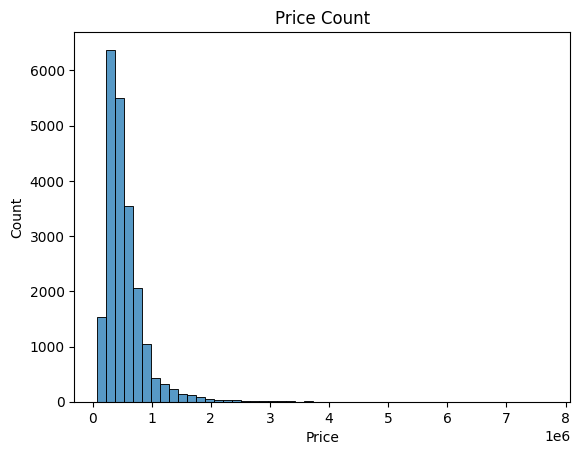

price
450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
280400.0       1
118000.0       1
202200.0       1
1851000.0      1
320600.0       1
Name: count, Length: 4028, dtype: int64

In [18]:
# Î†àÏù¥Î∏î Í∞ØÏàò ÌôïÏù∏ (Í∑∏ÎûòÌîÑ)
sns.histplot(df['price'], bins=50) #priceÍ∞Ä Ïó∞ÏÜçÌòïÏù¥ÎØÄÎ°ú Î∂ÑÎ•òÏóêÏÑú Ïì∞Ïù¥Îäî countplot ÎåÄÏã†hisplotÏÇ¨
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Count")
plt.show()

# Î†àÏù¥Î∏î Í∞ØÏàò ÌôïÏù∏ (Ïà´Ïûê)
df['price'].value_counts()


<h2><b>1-4. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨</b></h2>

In [19]:
#1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞Îäî Ïù¥ÎØ∏ ÏúÑÏóêÏÑú Ïã§Ìñ•
#2. Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
df = df.drop(columns = ['id','date'])

#3. ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ ÏûÖÎ†• Î≥ÄÏàò Î∂ÑÎ¶¨
X = df.drop(columns=['price'])
y = df['price']

#4. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ïõê-Ìï´ Ïù∏ÏΩîÎî© (zipcode)
X = pd.get_dummies(X, columns=['zipcode'], drop_first = True)

#5. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#6. ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#7. ÌôïÏù∏
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17290, 86)
X_test shape: (4323, 86)
y_train shape: (17290,)
y_test shape: (4323,)


<h2><b>1-5. Î™®Îç∏ Íµ¨ÏÑ±&Ïª¥ÌååÏùº(ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ Ïù¥Ïö©ÌïòÏó¨)</b></h2>

In [20]:
# 1. Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò Ï†ïÏùò
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', min_value=32, max_value=256, step=32),
                    activation='relu',
                    input_shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units2', min_value=16, max_value=128, step=16),
                    activation='relu'))
    model.add(Dense(1))  # ÌöåÍ∑Ä

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')
        ),
        loss='mse',
        metrics=['mae']
    )
    return model

# 2. HyperParameters ÏàòÎèô ÏÑ§Ï†ï
hp = HyperParameters()
hp.values['units1'] = 64
hp.values['units2'] = 32
hp.values['learning_rate'] = 0.001

# 3. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÏöîÏïΩ Ï∂úÎ†•
model = build_model(hp)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_3 (Dense)                      ‚îÇ (None, 64)                  ‚îÇ           5,568 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                      ‚îÇ (None, 32)                  ‚îÇ           2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ              33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

<h2><b>1-6. Î™®Îç∏ ÌïôÏäµ </b></h2>

In [21]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
433/433 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 9ms/step - loss: 426316955648.0000 - mae: 538376.9375 - val_loss: 393880666112.0000 - val_mae: 532127.4375
Epoch 2/100
433/433 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 8ms/step - loss: 408986222592.0000 - mae: 531840.8750 - val_loss: 363334172672.0000 - val_mae: 513842.2188
Epoch 3/100
433/433 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - loss: 388275339264.0000 - mae: 510705.8438 - val_loss: 300020006912.0000 - val_mae: 472547.7500
Epoch 4/100
433/433 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 303099838464.0000 - mae: 461456.8750 - val_loss: 217911951360.0000 - val_mae: 407924.0000
Epoch 5/100
433/433 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 219894251520.0000 - mae: 392362.1562 - val_loss: 147981598720.0000 - val_mae: 334168.3125
Epoch 6/100
433/433 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

<h2><b>1-7. ÏãúÍ∞ÅÌôî </b></h2>

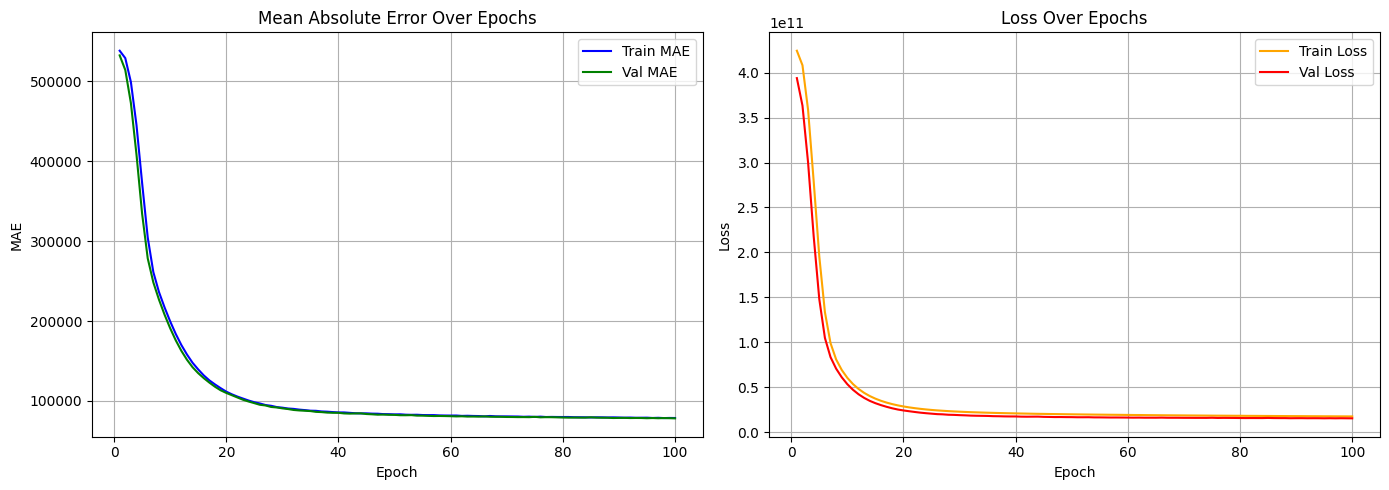

In [22]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Subplot ÏÉùÏÑ±
plt.figure(figsize=(14, 5))

# MAE Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
plt.plot(epochs, mae, 'b', label='Train MAE')
plt.plot(epochs, val_mae, 'g', label='Val MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'orange', label='Train Loss')
plt.plot(epochs, val_loss, 'red', label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.tight_layout()
plt.show()


## üìå MAE vs MSE(Loss)Ïùò Ï∞®Ïù¥

`Mean Absolute Error (MAE)`ÏôÄ `Mean Squared Error (MSE)`Îäî Î™®Îëê ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† Îïå ÏÇ¨Ïö©ÎêòÏßÄÎßå, Í≥ÑÏÇ∞ Î∞©ÏãùÍ≥º ÎØºÍ∞êÎèÑÏóêÏÑú Ï∞®Ïù¥Í∞Ä ÏûàÎã§.

---

### ‚úÖ 1. Mean Absolute Error (MAE)

- Ï†ïÏùò:  
  $$
  MAE = \frac{1}{n} \sum |y_{true} - y_{pred}|
  $$
- **ÏòàÏ∏° Ïò§Ï∞®Ïùò Ï†àÎåìÍ∞í ÌèâÍ∑†**
- ÌèâÍ∑†Ï†ÅÏúºÎ°ú **ÏñºÎßàÎÇò ÌãÄÎ†∏ÎäîÍ∞Ä?**Î•º ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§å
- Ïù¥ÏÉÅÏπòÏóê **Îçú ÎØºÍ∞ê**

---

### ‚úÖ 2. Mean Squared Error (MSE) ‚Äî ÏùºÎ∞òÏ†ÅÏúºÎ°ú `loss='mse'`

- Ï†ïÏùò:  
  $$
  MSE = \frac{1}{n} \sum (y_{true} - y_{pred})^2
  $$
- **Ïò§Ï∞®Ïùò Ï†úÍ≥± ÌèâÍ∑†**
- **Ïò§Ï∞®Í∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÌÅ∞ Ìå®ÎÑêÌã∞ Î∂ÄÏó¨**
- Ïù¥ÏÉÅÏπòÏóê **Îß§Ïö∞ ÎØºÍ∞ê**

---

### üìä ÏòàÏãú ÎπÑÍµê

| Ìï≠Î™©        | MAE                                  | MSE (Loss)                          |
|-------------|---------------------------------------|--------------------------------------|
| Ï∏°Ï†ï Î∞©Ïãù   | Ïò§Ï∞®Ïùò Ï†àÎåìÍ∞í                        | Ïò§Ï∞®Ïùò Ï†úÍ≥±                          |
| Í∞íÏùò ÏòÅÌñ•Î†• | Î™®Îì† Ïò§Ï∞®Í∞Ä ÎèôÏùºÌïú ÏòÅÌñ•Î†•             | **ÌÅ∞ Ïò§Ï∞®ÏùºÏàòÎ°ù** Ìõ®Ïî¨ Îçî ÌÅ¨Í≤å Î∞òÏòÅÎê® |
| ÎØºÍ∞êÎèÑ      | Ïù¥ÏÉÅÏπòÏóê Îçú ÎØºÍ∞êÌï®                    | Ïù¥ÏÉÅÏπòÏóê **Îß§Ïö∞ ÎØºÍ∞ê**                |
| Í∑∏ÎûòÌîÑ ÌòïÌÉú | ÏôÑÎßåÌïú Í≥°ÏÑ†Ïùº Ïàò ÏûàÏùå                 | Ï§ëÍ∞ÑÏóê **ÌäÄÎäî Í≥°ÏÑ†**Ïù¥ ÎÇòÏò¨ Ïàò ÏûàÏùå   |

---

### üîç Ïã§Ï†úÎ°úÎäî Ïñ¥ÎñªÍ≤å Îã§Î•∏Í∞ÄÏöî?

- ÏòàÏ∏°Ïù¥ ÏïàÏ†ïÏ†ÅÏùºÏàòÎ°ù MAEÏôÄ MSE Í∑∏ÎûòÌîÑÎäî Ïú†ÏÇ¨
- **ÏùºÎ∂Ä ÏòàÏ∏°Ïù¥ ÎßéÏù¥ Î≤óÏñ¥ÎÇú Í≤ΩÏö∞**, MSE Í∑∏ÎûòÌîÑÍ∞Ä Îçî ÏöîÎèôÏπòÍ±∞ÎÇò Í∞íÏù¥ Îçî ÌÅº

---

### ‚úÖ Í≤∞Î°†

> - `MAE`: ÏßÅÍ¥ÄÏ†ÅÏù∏ ÌèâÍ∑† Ïò§Ï∞® Ï∏°Ï†ï ÏßÄÌëú
> - `MSE`: Î™®Îç∏Ïù¥ Ïù¥ÏÉÅÏπòÏóê ÏñºÎßàÎÇò ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌïòÎäîÏßÄ Î≥¥Ïó¨Ï§å



MAEÏôÄ MSEÏùò Í∑∏ÎûòÌîÑÍ∞Ä Ïú†ÏÇ¨ÌïòÎØÄÎ°ú ÏòàÏ∏°Ïù¥ ÏïàÏ†ïÏ†ÅÏù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.

<h2><b>1-8. ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî </b></h2>

136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step


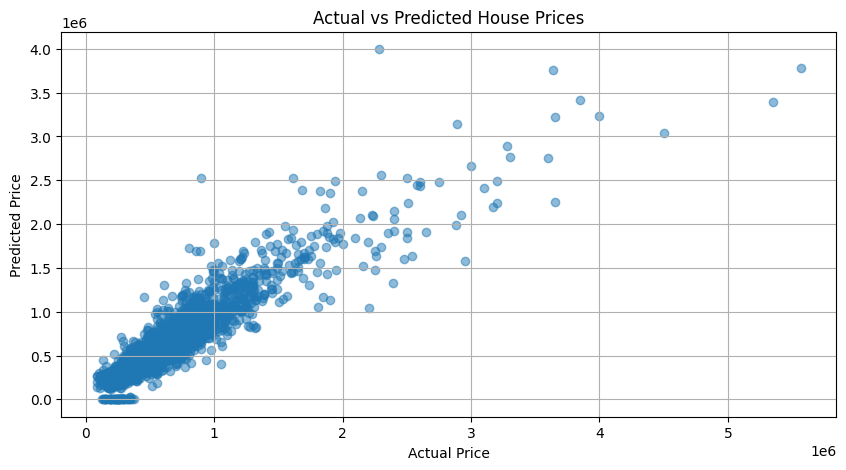

In [23]:
# ÏòàÏ∏°
y_pred = model.predict(X_test)

# ÎπÑÍµê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

<h2><b>1-8. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä </b></h2>

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ÏòàÏ∏°
y_pred = model.predict(X_test)

# ÏõêÎûòÏùò ÌÖåÏä§Ìä∏ ÌÉÄÍ≤ü (Series ‚Üí NumPy Î∞∞Ïó¥)
y_test_original = y_test.values
y_pred_original = y_pred.flatten()  # (n, 1) ‚Üí (n,)

# ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R¬≤ Score: {r2:.2f}")  # 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÏùå


136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
MSE: 21379640655.88
MAE: 83237.58
R¬≤ Score: 0.86
